In [28]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from math import sqrt

In [29]:
# Muat dataset
file_path = '/content/data.csv'
data = pd.read_csv(file_path)

In [30]:
# Tampilkan 10 kolom pertama untuk memastikan kolom target yang benar
print("10 Nama Kolom Pertama di Dataset:")
print(data.columns[:10])

# Tampilkan 5 baris pertama dari dataset untuk memahami struktur data
print("\n5 Baris Pertama Data:")
print(data.head())

10 Nama Kolom Pertama di Dataset:
Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category'],
      dtype='object')

5 Baris Pertama Data:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            M

In [31]:
# Ganti 'target' dengan nama kolom target yang benar setelah Anda memastikannya
target_col = 'target'  # Ubah sesuai nama kolom target yang benar

In [32]:
# Tentukan kolom target sebagai 'MSRP'
target_col = 'MSRP'

# 1. Eksplorasi Data (EDA)
print("Info Data:")
print(data.info())

print("\nDeskripsi Statistik:")
print(data.describe())

print("\nJumlah Nilai Kosong per Kolom:")
print(data.isnull().sum())

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(

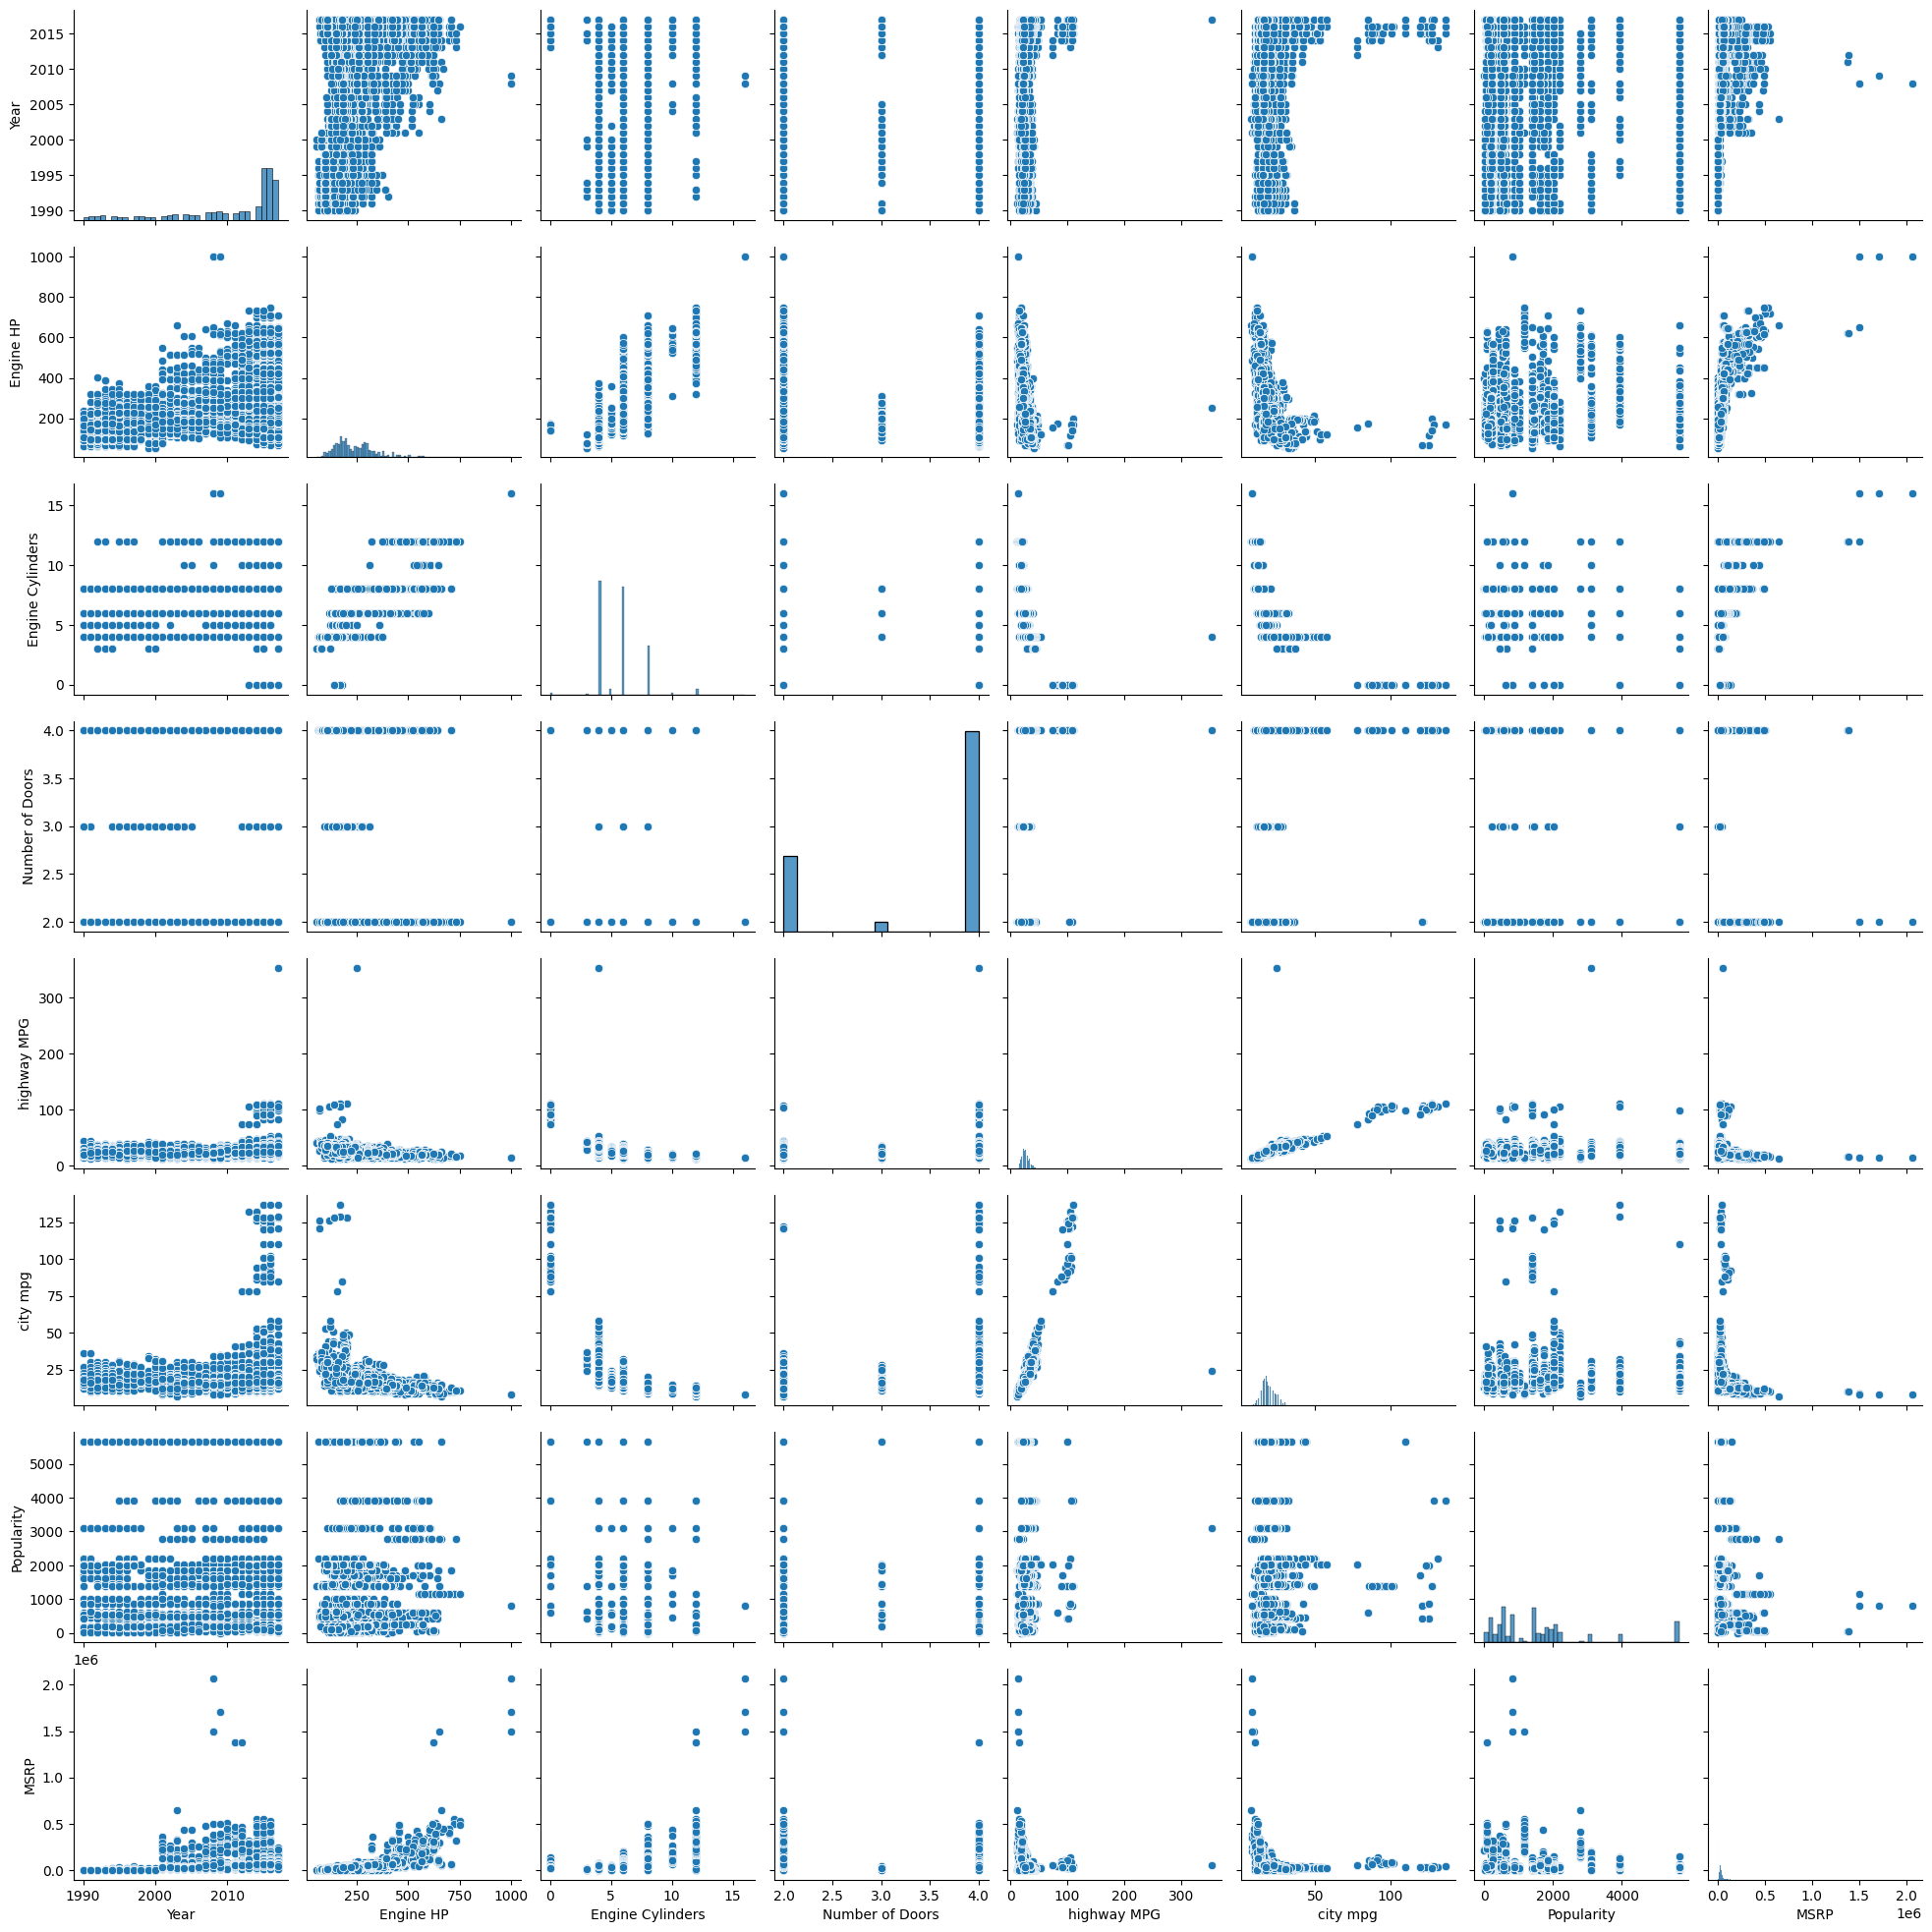

In [33]:
# Visualisasi beberapa variabel (hanya 10 kolom numerik pertama)
numeric_columns = data.select_dtypes(include=[np.number]).columns[:10]  # Pilih 10 kolom numerik pertama

# Pairplot untuk 10 variabel numerik pertama
sns.pairplot(data[numeric_columns])
plt.show()

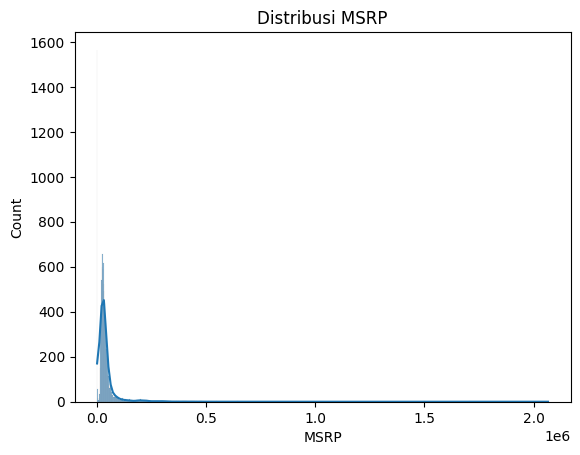

In [34]:
# Visualisasi distribusi target (MSRP)
sns.histplot(data[target_col], kde=True)
plt.title('Distribusi MSRP')
plt.show()

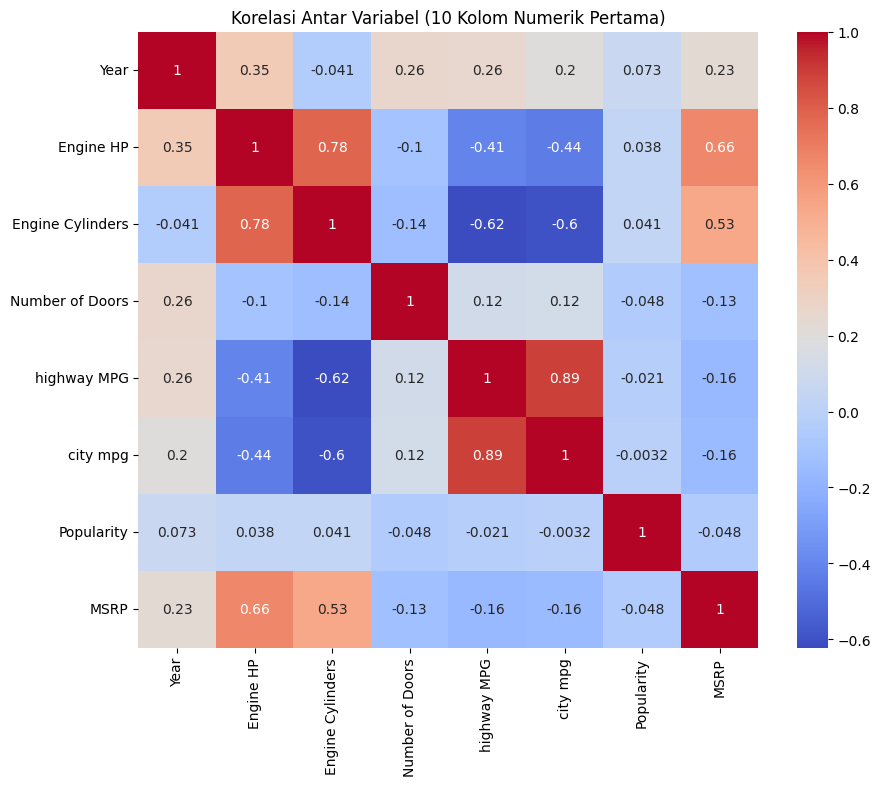

In [35]:
# Cek korelasi antar fitur (hanya untuk 10 kolom numerik pertama)
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Variabel (10 Kolom Numerik Pertama)")
plt.show()

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_simple = lin_reg.predict(X_test)

In [37]:
# Pisahkan fitur dan target
X = data.drop(columns=[target_col])
y = data[target_col]

# Identifikasi kolom numerik
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Mengisi nilai NaN di kolom numerik dengan nilai rata-rata kolom
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Ubah kolom kategori menjadi numerik menggunakan One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Langkah untuk mengurangi dimensi menggunakan PCA (Opsional, hanya jika banyak fitur)
# Misalnya, pilih 10 komponen utama
pca = PCA(n_components=10)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Gunakan derajat polinomial yang lebih rendah (misalnya degree=2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_reduced)
X_test_poly = poly_features.transform(X_test_reduced)

# Model regresi
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)


In [39]:
# Fungsi evaluasi untuk menghitung MSE, RMSE, dan R-squared
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")

# Evaluasi kedua model
print("\nEvaluasi Regresi Linear Sederhana:")
evaluate_model(y_test, y_pred_simple, "Regresi Linear Sederhana")

print("\nEvaluasi Regresi Linear dengan Basis Fungsi (Polynomial Degree=2):")
evaluate_model(y_test, y_pred_poly, "Regresi Polynomial Degree 2")


Evaluasi Regresi Linear Sederhana:
Regresi Linear Sederhana - MSE: 104673401.8937, RMSE: 10231.0020, R^2: 0.9561

Evaluasi Regresi Linear dengan Basis Fungsi (Polynomial Degree=2):
Regresi Polynomial Degree 2 - MSE: 607117955.9149, RMSE: 24639.7637, R^2: 0.7453


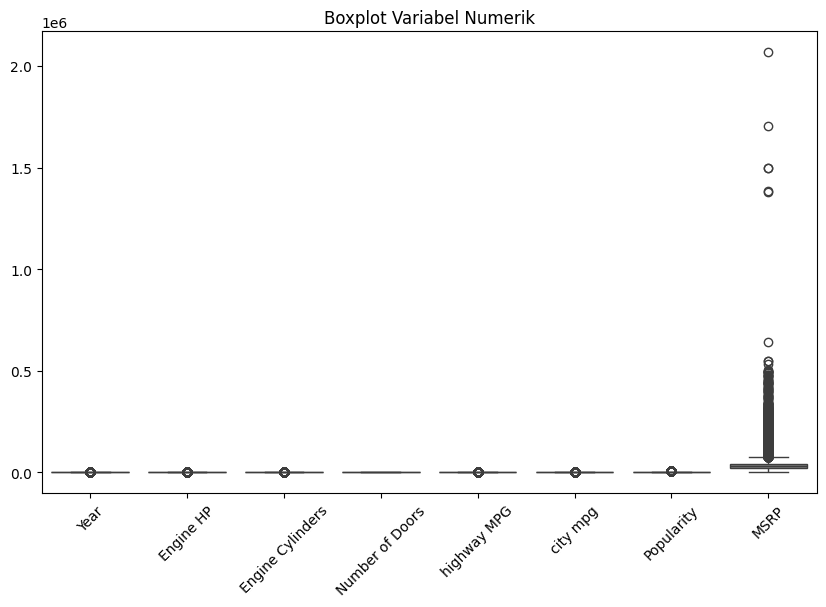

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_columns])
plt.title("Boxplot Variabel Numerik")
plt.xticks(rotation=45)
plt.show()

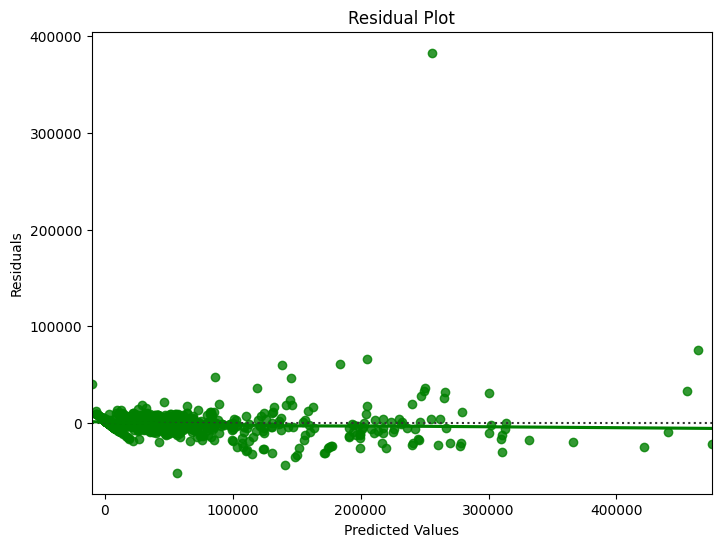

In [41]:
# Buat prediksi untuk data latih
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Plot residual
plt.figure(figsize=(8, 6))
sns.residplot(x=predictions, y=y_test - predictions, lowess=True, color="g")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

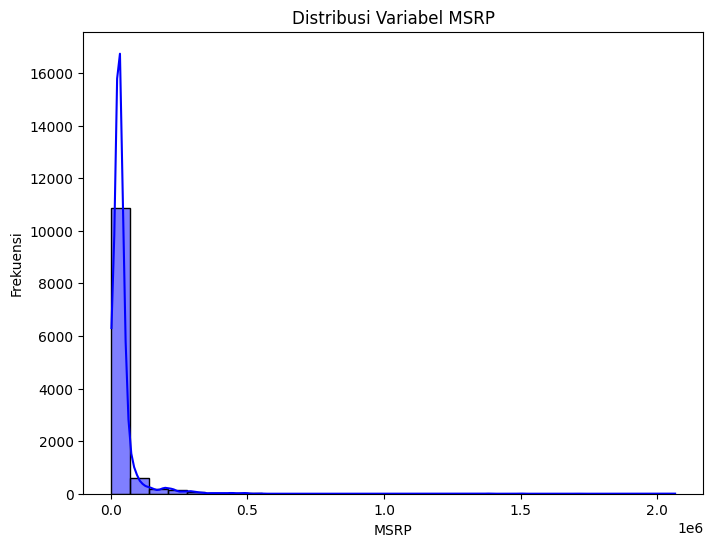

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(data['MSRP'], kde=True, color='blue', bins=30)
plt.title("Distribusi Variabel MSRP")
plt.xlabel("MSRP")
plt.ylabel("Frekuensi")
plt.show()

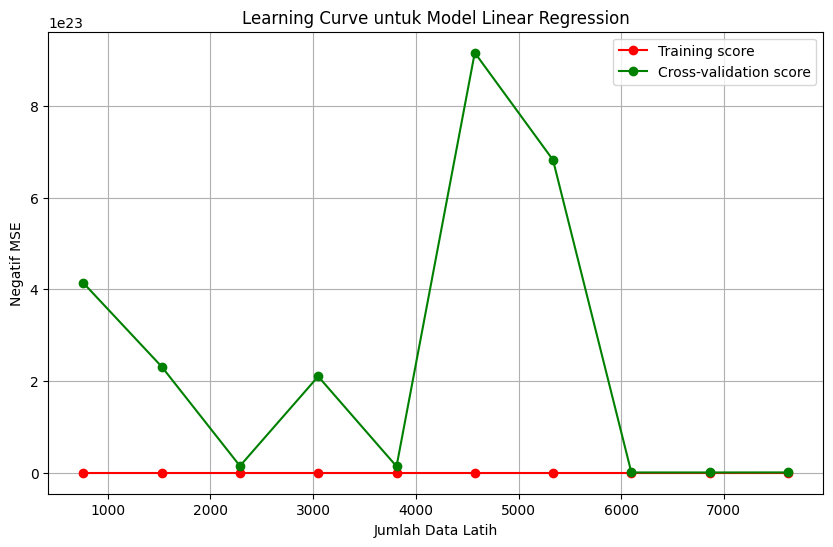

In [43]:
train_sizes, train_scores, test_scores = learning_curve(
    lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve untuk Model Linear Regression")
plt.xlabel("Jumlah Data Latih")
plt.ylabel("Negatif MSE")
plt.legend(loc="best")
plt.grid()
plt.show()